# Сравнительный анализ вакансий DS и DA с сайта hh.ru

Заказчик этого исследования — ЯндексПрактикум. В нашем распоряжении база данных с вакансиями с сайта hh.ru

**Цель исследования:** Существует гипотеза, что есть факторы, которые выделяют вакансии DS и DA в требованиях, описанных работодателем.

**Ход исследования**

Скачаем базы данных. У нас есть два файла: один с вакансиями DA, другой с вакансиями DS.

На первом этапе требуется выгрузить их и проверить качество. Затем перейдем к проверке гипотезы.

### Шаг 1. Откроем файлы с данными

In [717]:
# импортируем библиотеки
import os
import folium
import xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import itertools as it
from plotly import graph_objects as go
import seaborn as sns
pd.set_option('display.float_format', '{:,.2f}'.format)

In [718]:
# прочитаем файлы DA
da = pd.read_excel('/content/drive/MyDrive/vacancies_da.xlsx', sheet_name='Sheet1')
da.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,82978778,Data analyst,2024-04-09 10:29:02,https://hh.ru/vacancy/82978778,Открытая,Телеком биржа,NaN,Москва,Junior+ (1-3 years),"['HTTP', 'Pandas', 'Linux', 'Git', 'Clickhouse...",Полный день,Полная занятость,"кто мы: servicepipe - команда айтишников, кото...",servicepipe команда айтишник работать рынок иб...,NaN,NaN,ЗП не указана,"SQL, Математическая статистика, Linux, Clickho...",Pandas,NaN
1,85053195,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Inf...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация
2,85053196,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053196,Открытая,Axenix (ранее Accenture),NaN,Ростов-на-Дону,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Gre...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация
3,86081569,Data analyst / Аналитик данных,2024-04-27 23:34:50,https://hh.ru/vacancy/86081569,Открытая,IQnergy,NaN,Москва,Middle (3-6 years),"['Pandas', 'Анализ данных']",Полный день,Полная занятость,за последние 2 года мы (iqnergy) выросли в 5 р...,последний 2 год iqnergy вырастать 5 помогать o...,NaN,NaN,ЗП не указана,Анализ данных,Pandas,NaN
4,87407185,"Senior Data Analyst ""Growth""",2024-04-02 17:03:10,https://hh.ru/vacancy/87407185,Открытая,Okko,NaN,Санкт-Петербург,Middle (3-6 years),"['A/B тесты', 'confluence', 'SQL', 'Python']",Полный день,Полная занятость,"обязанности: аналитика привлечения, лояльност...",обязанность аналитика привлечение лояльность о...,NaN,NaN,ЗП не указана,"Python, SQL, A/B тесты",confluence,NaN


In [719]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                310 non-null    int64         
 1   name                              310 non-null    object        
 2   published_at                      310 non-null    datetime64[ns]
 3   alternate_url                     310 non-null    object        
 4   type                              310 non-null    object        
 5   employer                          310 non-null    object        
 6   department                        92 non-null     object        
 7   area                              310 non-null    object        
 8   experience                        310 non-null    object        
 9   key_skills                        310 non-null    object        
 10  schedule                          310 non-null    

In [720]:
# прочитаем файлы DS
ds = pd.read_excel('/content/drive/MyDrive/vacancies_ds.xlsx', sheet_name='Sheet1')
ds.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,67411146,"Ведущий Data Scientist, Ранжирование поиска",2024-04-02 11:20:17,https://hh.ru/vacancy/67411146,Открытая,Ozon,Ozon Информационные технологии,Москва,Middle (3-6 years),"['IT', 'Разработка поисковых технологий', 'dat...",Удаленная работа,Полная занятость,у нас петабайты реальных логов событий пользов...,петабайт реальный лог событие пользователь воз...,NaN,NaN,ЗП не указана,"Python, data science, Разработка поисковых тех...",NaN,NaN
1,78465611,Управляющий директор \ Data Scientist (Сопрово...,2024-04-27 10:10:12,https://hh.ru/vacancy/78465611,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Middle (3-6 years),"['Оценка рисков', 'Управление рисками', 'MS Po...",Полный день,Полная занятость,наша команда контроля и управления моделями яв...,наш команда контроль управление модель являтьс...,NaN,NaN,ЗП не указана,"Оценка рисков, MS PowerPoint, Статистический а...",NaN,NaN
2,81857265,Associate Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857265,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Middle (3-6 years),"['Machine Learning', 'Public Speaking', 'Writi...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,NaN
3,81857296,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857296,Открытая,Университет Иннополис,NaN,Москва,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов
4,81857358,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857358,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов


In [721]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                662 non-null    int64         
 1   name                              662 non-null    object        
 2   published_at                      662 non-null    datetime64[ns]
 3   alternate_url                     662 non-null    object        
 4   type                              662 non-null    object        
 5   employer                          662 non-null    object        
 6   department                        270 non-null    object        
 7   area                              662 non-null    object        
 8   experience                        662 non-null    object        
 9   key_skills                        662 non-null    object        
 10  schedule                          662 non-null    

**Дадим описание столцам:**

 0   **id** -                               идентификатор вакансии      
 1   **name**  -                            наименование вакансии        
 2   **published_at**  -                    дата публикации         
 3   **alternate_url**  -                   URL - адрес        
 4   **type**    -                          статус (открытая / закрытая)        
 5   **employer**   -                       работодатель        
 6   **department**    -                    департамент        
 7   **area**         -                     локация        
 8   **experience**  -                      опыт        
 9   **key_skills**   -                     ключевые навыки        
 10  **schedule**      -                    тип занятости       
 11  **employment**     -                   график работы       
 12  **description**     -                  описание вакансии        
 13  **description_lemmatized**   -         описание лемматизированное        
 14  **salary_from**        -               з/п от       
 15  **salary_to**      -                   з/п до       
 16  **salary_bin**      -                  фиксированный оклад        
 17  **key_skills_from_key_skills_field** - ключевые навыки описание        
 18  **hard_skills_from_description**   -   важные навыки       
 19  **soft_skills_from_description**   -  дополнительные навыки        

Количество столбцов и их наименование в обоих датафреймах совпадают, но отсутствует столбец для объединения, а также датафреймы отличаются по количеству строк. Так как оба фрейма имеют независимые друг от друга данные по разным вакансиям мы будем работать с каждым файлом в отдельности, что не мешает нашему анализу.


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте на пропуски и дубликаты

In [722]:
# проверим на пропуски
print(da.isna().sum())
print(ds.isna().sum())

id                                    0
name                                  0
published_at                          0
alternate_url                         0
type                                  0
employer                              0
department                          218
area                                  0
experience                            0
key_skills                            0
schedule                              0
employment                            0
description                           0
description_lemmatized                0
salary_from                         282
salary_to                           285
salary_bin                            0
key_skills_from_key_skills_field    123
hard_skills_from_description        198
soft_skills_from_description        224
dtype: int64
id                                    0
name                                  0
published_at                          0
alternate_url                         0
type                       

В обоих датафреймах присутствуют пропуски в стобцах **Департамент**, **з/п ОТ и ДО**,
а также в описаниях необходимых **навыков**.          
1) Колонка департамент не влияет на анализ, поэтому пропуски заполним обозначениями "no_name".             
2) Колонки с пропусками по з/п имеют числовой формат, поэтому пропуски оставим как есть, так как найти эти данные невозможно, а заполнение пропусков приведет к изменению формата колонки.             
3) С колонками, в которых не указаны навыки, поработаем в дальнейшем отдельно.

In [723]:
da['department'] = da['department'].fillna('no_name')
ds['department'] = ds['department'].fillna('no_name')

In [724]:
print(da.isna().sum())
print(ds.isna().sum())

id                                    0
name                                  0
published_at                          0
alternate_url                         0
type                                  0
employer                              0
department                            0
area                                  0
experience                            0
key_skills                            0
schedule                              0
employment                            0
description                           0
description_lemmatized                0
salary_from                         282
salary_to                           285
salary_bin                            0
key_skills_from_key_skills_field    123
hard_skills_from_description        198
soft_skills_from_description        224
dtype: int64
id                                    0
name                                  0
published_at                          0
alternate_url                         0
type                       

In [725]:
# проверим на явные дубликаты
print(da.duplicated().sum())
print(ds.duplicated().sum())

0
0


#### Шаг 2.2. Проверим типы данных

Пройдемся по каждому столбцу и сверим типы данных с хранящейся в них информацией.

In [726]:
print(da['id'].describe())
ds['id'].describe()

count          310.00
mean    95,253,106.35
std      2,342,788.74
min     82,978,778.00
25%     94,297,798.25
50%     95,638,568.00
75%     97,008,186.75
max     98,141,293.00
Name: id, dtype: float64


count          662.00
mean    95,094,693.14
std      2,610,613.30
min     67,411,146.00
25%     94,410,816.50
50%     95,464,027.50
75%     96,811,807.75
max     98,135,067.00
Name: id, dtype: float64

In [727]:
da['name'].sort_values().unique()

array(['Antifraud / data analyst',
       'BI-analyst \\ Data analyst \\ Аналитик данных (Senior)',
       'BI-аналитик / Data Analyst / Аналитик данных', 'Data Analyst',
       'Data Analyst "Growth"',
       'Data Analyst (Analytical Support Team) (Ru + En) JEDai',
       'Data Analyst (Big Data)', 'Data Analyst (C&B отдел)',
       'Data Analyst (Customer Communication)',
       'Data Analyst (Data Science и клиентская аналитика)',
       'Data Analyst (Finance)', 'Data Analyst (Game)',
       'Data Analyst (Growth Partner)', 'Data Analyst (SQL)',
       'Data Analyst (SberCampaigning)', 'Data Analyst (Sport)',
       'Data Analyst (e-commerce)', 'Data Analyst (junior)',
       'Data Analyst (middle/senior)', 'Data Analyst (remote)',
       'Data Analyst (senior)', 'Data Analyst (Антифрод, Поиск)',
       'Data Analyst (Блок Daily Banking)',
       'Data Analyst (Голос клиента)', 'Data Analyst (Качество поиска)',
       'Data Analyst (Клиентская аналитика)',
       'Data Analyst (Ко

In [728]:
ds['name'].sort_values().unique()

array(['Assistant Professor - Data Science&AI (english)',
       'Associate Professor - Data Science&AI (english)',
       'Computer Vision Engineer \\ Data Scientist в команду Layer, SberDevices.',
       'Cпециалист по работе с данными (Data Scientist)',
       'Data Analyst (Data Science и клиентская аналитика)',
       'Data Analyst / Data Scientist (Junior/Junior+)',
       'Data Analyst / Data scientist',
       'Data Analyst / Data scientist middle',
       'Data Analyst/Data Scientist',
       'Data Engineer / Data scientist Middle', 'Data Science',
       'Data Science (Компьютерное зрение)',
       'Data Science (подразделение комплаенс)',
       'Data Science / ML инженер',
       'Data Science Lead / Руководитель группы специалистов по машинному обучению и аналитике данных',
       'Data Science Manager', 'Data Science Project',
       'Data Science Specialist',
       'Data Science Team Lead в команду Virtual Assistants',
       'Data Science специалист', 'Data Scientist',

Видим, что наименования вакансий требуют категоризации для удобства работы, так как большой разброс вариаций написания. Предварительно можно скачать, что их следует разделить по грейдам.

In [729]:
print(da['published_at'].describe())
ds['published_at'].describe()

count                              310
mean     2024-04-10 08:37:02.248387072
min                2024-03-06 08:13:00
25%      2024-03-28 20:27:22.249999872
50%                2024-04-14 11:46:01
75%                2024-04-22 18:49:14
max                2024-04-30 12:51:55
Name: published_at, dtype: object


count                              662
mean     2024-04-06 22:12:30.661631744
min                2024-02-29 15:01:35
25%                2024-03-26 00:49:45
50%                2024-04-09 13:37:07
75%      2024-04-22 09:43:16.249999872
max                2024-04-30 11:41:03
Name: published_at, dtype: object

Вакансии DA представлены за период с 6 марта по 30 апреля 2024 года. А вакансии DS с 29 февраля по 30 апреля этого же года. Можно сделать вывод, что в выгрузке данные за два месяц - март и апрель.

Столбец с URL адресами мы проверять не будем, так как не планируем использовать его в анализе.

In [730]:
da['type'].sort_values().unique()

array(['Открытая'], dtype=object)

In [731]:
ds['type'].sort_values().unique()

array(['Открытая'], dtype=object)

На момент выгрузки данных все вакансии были активны.

In [732]:
da['department'].sort_values().unique()

array([' Альфа-Банк', 'no_name', '«МТС», Digital',
       'Ак Барс Банк, Начало карьеры',
       'Группа компаний «Group4Media», Управляющая компания', 'ИТ',
       'Компания «СПОРТМАСТЕР», Sportmaster Lab',
       'Лента, федеральная розничная сеть, IT ',
       'Леруа Мерлен. Центральный офис', 'МегаФон, IT',
       'ПАО «Промсвязьбанк», Бизнес и инфраструктура',
       'Почта Банк. Экспертам и руководителям', 'РЕСО-Гарантия, САО, IT',
       'Сбер для экспертов', 'Сбер. Data Science', 'Сбер. IT'],
      dtype=object)

In [733]:
ds['department'].sort_values().unique()

array(['Digital & IT', 'HeadHunter::Analytics/Data Science',
       'MERLION: IT', 'Ozon Информационные технологии', 'Rambler&Co',
       'Simple. Дирекция по информационным технологиям', 'VK',
       'VK, Рекламные технологии', 'no_name', '«МТС» ', '«МТС», Digital',
       '«РОСБАНК»', 'АВИТО ТЕХ: разработка',
       'АШАН Ритейл Россия, Работа в IT', 'Альфа-Банк. Центральный офис',
       'БКС IT & Digital', 'ГК Иннотех | Большие данные',
       'ГК Иннотех | Финтех (Иннотех)', 'Газпромбанк',
       'Гознак. Информационные технологии', 'Группа НЛМК ИТ и Диджитал',
       'ДОМ.РФ ИТ', 'ДОМ.РФ Профи', 'ИК "Сибинтек"',
       'Компания «СПОРТМАСТЕР», Sportmaster Lab',
       'Лента, федеральная розничная сеть, Супермаркет', 'МегаФон, IT',
       'Московский Кредитный Банк. Профессионалы', 'НОРБИТ',
       'ПАО «Газпром нефть» Закупки', 'ПАО «Газпром нефть» ИТ',
       'ПАО «Газпром нефть» Разведка и добыча',
       'ПАО «Промсвязьбанк», Бизнес и инфраструктура',
       'ПАО ВТБ, Подразд

In [734]:
da['area'].sort_values().unique()

array(['Владивосток', 'Воронеж', 'Екатеринбург',
       'Иваново (Ивановская область)', 'Ижевск', 'Казань', 'Калининград',
       'Киров (Кировская область)', 'Краснодар', 'Москва',
       'Нижний Новгород', 'Новосибирск', 'Пермь', 'Ростов-на-Дону',
       'Самара', 'Санкт-Петербург', 'Ступино', 'Томск', 'Тюмень'],
      dtype=object)

In [735]:
ds['area'].sort_values().unique()

array(['Верхняя Пышма', 'Владивосток', 'Воронеж', 'Екатеринбург',
       'Ижевск', 'Казань', 'Калининград', 'Краснодар', 'Липецк', 'Москва',
       'Нижний Новгород', 'Новосибирск', 'Пермь', 'Ростов-на-Дону',
       'Самара', 'Санкт-Петербург', 'Сочи', 'Таганрог', 'Томск', 'Тюмень',
       'Челябинск', 'Южно-Сахалинск', 'Ярославль'], dtype=object)

In [736]:
da['experience'].sort_values().unique()

array(['Junior (no experince)', 'Junior+ (1-3 years)',
       'Middle (3-6 years)', 'Senior (6+ years)'], dtype=object)

In [737]:
ds['experience'].sort_values().unique()

array(['Junior (no experince)', 'Junior+ (1-3 years)',
       'Middle (3-6 years)', 'Senior (6+ years)'], dtype=object)

Визуально с колонками **Департамет**, **Локация** и **Опыт** все в порядке. Также можно сказать, что наименования вакансий можно не делить по грейдам, так как требования уже указаны в клонке "Опыт".

Колонки с **описанием навыков** и **описанием вакансии** мы разберем отдельно из-за большого количества данных в них.

In [738]:
da['schedule'].sort_values().unique()

array(['Гибкий график', 'Полный день', 'Сменный график',
       'Удаленная работа'], dtype=object)

In [739]:
ds['schedule'].sort_values().unique()

array(['Гибкий график', 'Полный день', 'Сменный график',
       'Удаленная работа'], dtype=object)

In [740]:
da['employment'].sort_values().unique()

array(['Полная занятость', 'Частичная занятость'], dtype=object)

In [741]:
ds['employment'].sort_values().unique()

array(['Полная занятость', 'Проектная работа', 'Стажировка',
       'Частичная занятость'], dtype=object)

In [742]:
print(da['salary_from'].describe())
da['salary_to'].describe()

count        28.00
mean    163,837.50
std      69,247.89
min      60,000.00
25%     117,500.00
50%     150,000.00
75%     187,000.00
max     350,000.00
Name: salary_from, dtype: float64


count        25.00
mean    250,528.00
std     113,524.72
min      90,000.00
25%     150,000.00
50%     218,400.00
75%     300,000.00
max     495,550.00
Name: salary_to, dtype: float64

In [743]:
print(ds['salary_to'].describe())
ds['salary_from'].describe()

count        56.00
mean    265,431.25
std     115,406.30
min      30,000.00
25%     200,000.00
50%     300,000.00
75%     350,000.00
max     550,000.00
Name: salary_to, dtype: float64


count        53.00
mean    166,386.79
std      75,270.64
min      25,000.00
25%     110,000.00
50%     150,000.00
75%     200,000.00
max     350,000.00
Name: salary_from, dtype: float64

In [744]:
da['salary_bin'].sort_values().unique()

array(['Больше 300 тысяч', 'ЗП не указана', 'Меньше 100 тысяч',
       'От 100 тысяч до 200 тысяч', 'От 200 тысяч до 300 тысяч'],
      dtype=object)

In [745]:
ds['salary_bin'].sort_values().unique()

array(['Больше 300 тысяч', 'ЗП не указана', 'Меньше 100 тысяч',
       'От 100 тысяч до 200 тысяч', 'От 200 тысяч до 300 тысяч'],
      dtype=object)

#### Шаг 2.3 Создадим новую колонку

Создадим дополнительный столбец со сведениями о заработной плате, чтобы в него вошли значения всех трех столбцов с диапазонами зп, которую указали работодатели.

In [746]:
da.loc[ da['salary_from'] > 300, 'salary_new'] = 'Больше 300 тысяч'
da.loc[ da['salary_to'] < 100, 'salary_new'] = 'Меньше 100 тысяч'
da.loc[ (da['salary_from'] > 100) & (da['salary_to'] < 200), 'salary_new'] = 'От 100 тысяч до 200 тысяч'
da.loc[ (da['salary_from'] > 200) & (da['salary_to'] < 300), 'salary_new'] = 'От 200 тысяч до 300 тысяч'
da.loc[ da['salary_bin'] == 'Больше 300 тысяч', 'salary_new'] = 'Больше 300 тысяч'
da.loc[ da['salary_bin'] == 'Меньше 100 тысяч', 'salary_new'] = 'Меньше 100 тысяч'
da.loc[ da['salary_bin'] == 'От 100 тысяч до 200 тысяч', 'salary_new'] = 'От 100 тысяч до 200 тысяч'
da.loc[ da['salary_bin'] == 'От 200 тысяч до 300 тысяч', 'salary_new'] = 'От 200 тысяч до 300 тысяч'
da.loc[ da['salary_bin'] == 'ЗП не указана', 'salary_new'] = 'ЗП не указана'
da.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_new
0,82978778,Data analyst,2024-04-09 10:29:02,https://hh.ru/vacancy/82978778,Открытая,Телеком биржа,no_name,Москва,Junior+ (1-3 years),"['HTTP', 'Pandas', 'Linux', 'Git', 'Clickhouse...",...,Полная занятость,"кто мы: servicepipe - команда айтишников, кото...",servicepipe команда айтишник работать рынок иб...,NaN,NaN,ЗП не указана,"SQL, Математическая статистика, Linux, Clickho...",Pandas,NaN,ЗП не указана
1,85053195,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),no_name,Краснодар,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Inf...",...,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация,ЗП не указана
2,85053196,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053196,Открытая,Axenix (ранее Accenture),no_name,Ростов-на-Дону,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Gre...",...,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация,ЗП не указана
3,86081569,Data analyst / Аналитик данных,2024-04-27 23:34:50,https://hh.ru/vacancy/86081569,Открытая,IQnergy,no_name,Москва,Middle (3-6 years),"['Pandas', 'Анализ данных']",...,Полная занятость,за последние 2 года мы (iqnergy) выросли в 5 р...,последний 2 год iqnergy вырастать 5 помогать o...,NaN,NaN,ЗП не указана,Анализ данных,Pandas,NaN,ЗП не указана
4,87407185,"Senior Data Analyst ""Growth""",2024-04-02 17:03:10,https://hh.ru/vacancy/87407185,Открытая,Okko,no_name,Санкт-Петербург,Middle (3-6 years),"['A/B тесты', 'confluence', 'SQL', 'Python']",...,Полная занятость,"обязанности: аналитика привлечения, лояльност...",обязанность аналитика привлечение лояльность о...,NaN,NaN,ЗП не указана,"Python, SQL, A/B тесты",confluence,NaN,ЗП не указана


In [747]:
ds.loc[ ds['salary_from'] > 300, 'salary_new'] = 'Больше 300 тысяч'
ds.loc[ ds['salary_to'] < 100, 'salary_new'] = 'Меньше 100 тысяч'
ds.loc[ (ds['salary_from'] > 100) & (ds['salary_to'] < 200), 'salary_new'] = 'От 100 тысяч до 200 тысяч'
ds.loc[ (ds['salary_from'] > 200) & (ds['salary_to'] < 300), 'salary_new'] = 'От 200 тысяч до 300 тысяч'
ds.loc[ ds['salary_bin'] == 'Больше 300 тысяч', 'salary_new'] = 'Больше 300 тысяч'
ds.loc[ ds['salary_bin'] == 'Меньше 100 тысяч', 'salary_new'] = 'Меньше 100 тысяч'
ds.loc[ ds['salary_bin'] == 'От 100 тысяч до 200 тысяч', 'salary_new'] = 'От 100 тысяч до 200 тысяч'
ds.loc[ ds['salary_bin'] == 'От 200 тысяч до 300 тысяч', 'salary_new'] = 'От 200 тысяч до 300 тысяч'
ds.loc[ ds['salary_bin'] == 'ЗП не указана', 'salary_new'] = 'ЗП не указана'
ds.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_new
0,67411146,"Ведущий Data Scientist, Ранжирование поиска",2024-04-02 11:20:17,https://hh.ru/vacancy/67411146,Открытая,Ozon,Ozon Информационные технологии,Москва,Middle (3-6 years),"['IT', 'Разработка поисковых технологий', 'dat...",...,Полная занятость,у нас петабайты реальных логов событий пользов...,петабайт реальный лог событие пользователь воз...,NaN,NaN,ЗП не указана,"Python, data science, Разработка поисковых тех...",NaN,NaN,ЗП не указана
1,78465611,Управляющий директор \ Data Scientist (Сопрово...,2024-04-27 10:10:12,https://hh.ru/vacancy/78465611,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Middle (3-6 years),"['Оценка рисков', 'Управление рисками', 'MS Po...",...,Полная занятость,наша команда контроля и управления моделями яв...,наш команда контроль управление модель являтьс...,NaN,NaN,ЗП не указана,"Оценка рисков, MS PowerPoint, Статистический а...",NaN,NaN,ЗП не указана
2,81857265,Associate Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857265,Открытая,Университет Иннополис,no_name,Санкт-Петербург,Middle (3-6 years),"['Machine Learning', 'Public Speaking', 'Writi...",...,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,NaN,ЗП не указана
3,81857296,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857296,Открытая,Университет Иннополис,no_name,Москва,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",...,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов,ЗП не указана
4,81857358,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857358,Открытая,Университет Иннополис,no_name,Санкт-Петербург,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",...,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов,ЗП не указана


### Подытог:

Оба датафрейма имеют одинаковое количество столбцов и разные наборы строк. В обоих датафреймах присутствуют пропуски в столбцах «Департамент», «ЗП ОТ» и «ЗП ДО», а также в описаниях навыков.

Для столбца «Департамент» пропуски заполним значениями «no_name». Пропуски в столбцах «ЗП ОТ» и «ЗП ДО» оставим как есть, так как найти эти данные невозможно, а заполнение пропусков изменит формат столбцов.

С колонками, в которых указаны навыки, будем работать отдельно. Необходимо разделить вакансии по грейдам, так как наименования вакансий требуют категоризации из-за большого разброса вариантов написания.

Вакансии DA представлены за период с 6 марта по 30 апреля 2024 года, а вакансии DS — с 29 февраля по 30 апреля того же года. Таким образом, данные в выгрузке относятся к двум месяцам — марту и апрелю.

Столбец с URL-адресами анализировать не будем, так как не планируем использовать его в анализе. Визуально столбцы «Департамент», «Локация» и «Опыт» выглядят нормально. Также можно сказать, что наименования вакансий можно не разделять по грейдам, так как требования уже указаны в столбце «Опыт».

Создадим дополнительный столбец для сведений о заработной плате, куда включим значения всех трёх столбцов с диапазонами ЗП, указанных работодателями.

## Шаг 3. Определим навыки специалистов

### Шаг 3.1 Определим ключевые навыки

Приведем в порядок написание в колонке с **ключевыми навыками** и создадим отдельный список.

In [748]:
#достанем ключевые скилы из столбца key_skills для вакансий DA
key_skills_da = da['key_skills'].str.split(', ', expand=True).stack().reset_index(drop=True)
key_skills_da.head()

0         ['HTTP'
1        'Pandas'
2         'Linux'
3           'Git'
4    'Clickhouse'
dtype: object

In [749]:
# отредактируем данные, удалив лишние символы и приведя все слова к нижнему регистру
for i in range(1,(len(key_skills_da))):
  key_skills_da[i] = key_skills_da[i].lower()
  if '[' in key_skills_da[i]:
    key_skills_da[i] = key_skills_da[i].replace('[', '')
  if ']' in key_skills_da[i]:
    key_skills_da[i] = key_skills_da[i].replace(']', '')
  if "'" in key_skills_da[i]:
    key_skills_da[i] = key_skills_da[i].replace("'", '')
  key_skills_da[i] = key_skills_da[i].strip()

key_skills_da

0                  ['HTTP'
1                   pandas
2                    linux
3                      git
4               clickhouse
               ...        
1459    внимание к деталям
1460         бизнес-анализ
1461       прогнозирование
1462              power bi
1463                      
Length: 1464, dtype: object

In [750]:
# преобразуем данные в датафрейм и добавим столбец для счета количества данных
key_skills_da = pd.DataFrame(key_skills_da)
key_skills_da['count'] = 1
key_skills_da = key_skills_da.groupby(0).count().sort_values(by='count', ascending=False).head(20)
key_skills_da

,count
0,
sql,156
python,129
pandas,88
,61
data analysis,57
анализ данных,53
документация,45
аналитическое мышление,43
power bi,39


In [751]:
# удалим строку с пустыми значениями
key_skills_da = key_skills_da.reset_index().drop(index=3)
key_skills_da = key_skills_da.set_index(0)

In [752]:
fig = px.bar(key_skills_da,
             title='Количество заявленных ключевых навыков для вакансий DA', orientation='h',
             labels={'0':'Навык', 'value':'Количество вакансий'}, height=000, width=700)
fig.update_layout(yaxis = {'categoryorder':'total ascending'})
fig.show()

In [753]:
#достанем ключевые скилы из столбца key_skills для вакансий DS
key_skills_ds = ds['key_skills'].str.split(', ', expand=True).stack().reset_index(drop=True)
key_skills_ds.head()

0                                ['IT'
1    'Разработка поисковых технологий'
2                       'data science'
3                            'Python']
4                     ['Оценка рисков'
dtype: object

In [754]:
# отредактируем данные, удалив лишние символы и приведя все слова к нижнему регистру
for i in range(1,(len(key_skills_ds))):
  key_skills_ds[i] = key_skills_ds[i].lower()
  if '[' in key_skills_ds[i]:
    key_skills_ds[i] = key_skills_ds[i].replace('[', '')
  if ']' in key_skills_ds[i]:
    key_skills_ds[i] = key_skills_ds[i].replace(']', '')
  if "'" in key_skills_ds[i]:
    key_skills_ds[i] = key_skills_ds[i].replace("'", '')
  key_skills_ds[i] = key_skills_ds[i].strip()

key_skills_ds

0                                 ['IT'
1       разработка поисковых технологий
2                          data science
3                                python
4                         оценка рисков
                     ...               
2829                multi-armed bandits
2830                             python
2831          математическая статистика
2832              статистический анализ
2833                                sql
Length: 2834, dtype: object

In [755]:
# преобразуем данные в датафрейм и добавим столбец для счета количества данных
key_skills_ds = pd.DataFrame(key_skills_ds)
key_skills_ds['count'] = 1
key_skills_ds = key_skills_ds.groupby(0).count().sort_values(by='count', ascending=False).head(21)
key_skills_ds

,count
0,
python,290
pandas,256
sql,176
,118
документация,110
machine learning,98
ml,79
коммуникация,72
data science,68


In [756]:
# удалим строку с пустыми значениями
key_skills_ds = key_skills_ds.reset_index().drop(index=3)
key_skills_ds = key_skills_ds.set_index(0)

In [757]:
fig = px.bar(key_skills_ds,
             title='Количество заявленных ключевых навыков для вакансий DS', orientation='h',
             labels={'0':'Навык', 'value':'Количество вакансий'}, height=500, width=700)
fig.update_layout(yaxis = {'categoryorder':'total ascending'})
fig.show()

Среди ключевых навыков, заявленных работодателями, мы выявили ТОП 20 для DS и DA. ТОП-3 навыков одинаковы для обеих областей - это питон, пандас и SQL, с той лишь разницей, что у DS чаще спрашивают питон, а у DA - SQL.
С 4-й по 7-ю строчку расположились навыки, определяющие разницу в вакансиях: для DA - Анализ данных, аналитическое мышление, а для DS - машинное обучение. Навык документация пересекается в обеих вакансиях.

Проверим, есть ли различия в данных с колонкой **key_skills_from_key_skills_field**

In [758]:
#достанем ключевые скилы из столбца key_skills_from_key_skills_field для вакансий DA
key_skills_da = da['key_skills_from_key_skills_field'].str.split(', ', expand=True).stack().reset_index(drop=True)
key_skills_da.head()

0                          SQL
1    Математическая статистика
2                        Linux
3                   Clickhouse
4                           BI
dtype: object

In [759]:
# преобразуем данные в датафрейм и добавим столбец для счета количества данных
key_skills_da = pd.DataFrame(key_skills_da)
key_skills_da['count'] = 1
key_skills_da = key_skills_da.groupby(0).count().sort_values(by='count', ascending=False).head(20)
key_skills_da

,count
0,
SQL,156
Python,129
Data Analysis,57
Анализ данных,53
Power BI,38
Аналитическое мышление,31
Big Data,26
Аналитика,24
A/B тесты,23


In [760]:
fig = px.bar(key_skills_da,
             title='Количество заявленных ключевых навыков для вакансий DA', orientation='h',
             labels={'0':'Навык', 'value':'Количество вакансий'}, height=700, width=700)
fig.update_layout(yaxis = {'categoryorder':'total ascending'})
fig.show()

In [761]:
#достанем ключевые скилы из столбца key_skills_from_key_skills_field для вакансий DS
key_skills_ds = ds['key_skills_from_key_skills_field'].str.split(', ', expand=True).stack().reset_index(drop=True)
key_skills_ds.head()

0                             Python
1                       data science
2    Разработка поисковых технологий
3                                 IT
4                      Оценка рисков
dtype: object

In [762]:
# преобразуем данные в датафрейм и добавим столбец для счета количества данных
key_skills_ds = pd.DataFrame(key_skills_ds)
key_skills_ds['count'] = 1
key_skills_ds = key_skills_ds.groupby(0).count().sort_values(by='count', ascending=False).head(20)
key_skills_ds

,count
0,
Python,290
SQL,176
Machine Learning,91
ML,79
Data Science,55
Математическая статистика,48
Big Data,46
Pandas,45
PyTorch,45


In [763]:
fig = px.bar(key_skills_ds,
             title='Количество заявленных ключевых навыков для вакансий DA', orientation='h',
             labels={'0':'Навык', 'value':'Количество вакансий'}, height=700, width=700)
fig.update_layout(yaxis = {'categoryorder':'total ascending'})
fig.show()

Мы видим существенные различия в данных колонки skills_from_key_skills_field и key_skills. Так как основной колонкой при выгрузке вакансий с сайте hh.ru является колонка key_skills, то будем руководствоваться ею.

### Шаг 3.2 Определим важные навыки (хард скилы)

In [764]:
#достанем хард скилы из столбца hard_skills_from_description для вакансий DA
hars_skills_da = da['hard_skills_from_description'].str.split(', ', expand=True).stack().reset_index(drop=True)
hars_skills_da.head()

0            Pandas
1            Pandas
2        confluence
3    Юнит-экономика
4            Pandas
dtype: object

In [765]:
# преобразуем данные в датафрейм и добавим столбец для счета количества данных
hars_skills_da = pd.DataFrame(hars_skills_da)
hars_skills_da['count'] = 1
hars_skills_da = hars_skills_da.groupby(0).count().sort_values(by='count', ascending=False).head(20)
hars_skills_da

,count
0,
Pandas,81
confluence,28
Юнит-экономика,11
Google Sheets,1


In [766]:
fig = px.bar(hars_skills_da,
             title='Количество заявленных хард навыков для вакансий DA', orientation='h',
             labels={'0':'Навык', 'value':'Количество вакансий'}, height=500, width=700)
fig.update_layout(yaxis = {'categoryorder':'total ascending'})
fig.show()

In [767]:
#достанем хард скилы из столбца hard_skills_from_description для вакансий DS
hars_skills_ds = ds['hard_skills_from_description'].str.split(', ', expand=True).stack().reset_index(drop=True)
hars_skills_ds.head()

0    Юнит-экономика
1    Юнит-экономика
2    Юнит-экономика
3        confluence
4            Pandas
dtype: object

In [768]:
# преобразуем данные в датафрейм и добавим столбец для счета количества данных
hars_skills_ds = pd.DataFrame(hars_skills_ds)
hars_skills_ds['count'] = 1
hars_skills_ds = hars_skills_ds.groupby(0).count().sort_values(by='count', ascending=False).head(20)
hars_skills_ds

,count
0,
Pandas,237
confluence,56
Юнит-экономика,47


In [769]:
fig = px.bar(hars_skills_ds,
             title='Количество заявленных хард навыков для вакансий DS', orientation='h',
             labels={'0':'Навык', 'value':'Количество вакансий'}, height=500, width=700)
fig.update_layout(yaxis = {'categoryorder':'total ascending'})
fig.show()

В обязательные скиллы (хард скилл) по обеим вакансиям попала библиотека Пандас, confluence и Юнит-экономика. Количество необходимых умений очень сильно отличается от количества ключевых навыков. Возможно это связано с тем, что при заполнении вакансий работодатели пренебрегают выделением важных навыков и указывают все требования в колонке ключевых.

### Шаг 3.3 Определим софт скиллы

In [770]:
#достанем хард скилы из столбца soft_skills_from_description для вакансий DA
soft_skills_da = da['soft_skills_from_description'].str.split(', ', expand=True).stack().reset_index(drop=True)
soft_skills_da.head()

0              Документация
1              Документация
2    Аналитическое мышление
3           Решение проблем
4          Принятие решений
dtype: object

In [771]:
# преобразуем данные в датафрейм и добавим столбец для счета количества данных
soft_skills_da = pd.DataFrame(soft_skills_da)
soft_skills_da['count'] = 1
soft_skills_da = soft_skills_da.groupby(0).count().sort_values(by='count', ascending=False).head(20)
soft_skills_da

,count
0,
Документация,45
Коммуникация,35
Аналитическое мышление,13
Проактивность,6
Переговоры,4
Принятие решений,4
Решение проблем,3
Креативность,2
Внимание к деталям,1


In [772]:
fig = px.bar(soft_skills_da,
             title='Количество заявленных софт навыков для вакансий DA', orientation='h',
             labels={'0':'Навык', 'value':'Количество вакансий'}, height=500, width=700)
fig.update_layout(yaxis = {'categoryorder':'total ascending'})
fig.show()

In [773]:
#достанем хард скилы из столбца soft_skills_from_description для вакансий DS
soft_skills_ds = ds['soft_skills_from_description'].str.split(', ', expand=True).stack().reset_index(drop=True)
soft_skills_ds.head()

0    Презентация результатов
1    Презентация результатов
2               Коммуникация
3               Документация
4               Креативность
dtype: object

In [774]:
# преобразуем данные в датафрейм и добавим столбец для счета количества данных
soft_skills_ds = pd.DataFrame(soft_skills_ds)
soft_skills_ds['count'] = 1
soft_skills_ds = soft_skills_ds.groupby(0).count().sort_values(by='count', ascending=False).head(20)
soft_skills_ds

,count
0,
Документация,110
Коммуникация,72
Аналитическое мышление,15
Креативность,8
Проактивность,8
Презентация результатов,7
Принятие решений,5
Адаптивность,4
Внимание к деталям,3


In [775]:
fig = px.bar(soft_skills_ds,
             title='Количество заявленных софт навыков для вакансий DS', orientation='h',
             labels={'0':'Навык', 'value':'Количество вакансий'}, height=500, width=700)
fig.update_layout(yaxis = {'categoryorder':'total ascending'})
fig.show()

По набору софт навыков вакансии DS и DA выглядят одинаково, с той разницей, что среди DS чаже ждут людей с креативным мышление, а от DA ждут умения вести переговоры и решать проблемы.

### Шаг 3.4 Ключевые навыки в вакансиях DA по опыту работы

In [776]:
#отсортируем наш датафрей по грейду стажер
da_junior_no = da.loc[da['experience'] == 'Junior (no experince)']
da_junior_no.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_new
24,92070271,Младший аналитик данных (Junior Data Analyst),2024-03-18 22:41:00,https://hh.ru/vacancy/92070271,Открытая,СБЕР,Сбер для экспертов,Москва,Junior (no experince),[],...,Полная занятость,в команду сети продаж ищем аналитика данных об...,команда сеть продажа искать аналитика данные о...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,ЗП не указана
32,92361982,Junior Data Analyst,2024-03-29 17:17:56,https://hh.ru/vacancy/92361982,Открытая,"РЕСО-Гарантия, САО","РЕСО-Гарантия, САО, IT",Москва,Junior (no experince),['Аналитическое мышление'],...,Полная занятость,о нас. компания ресо-гарантия – один из лидеро...,компания ресо гарантия лидер страхование росси...,NaN,NaN,ЗП не указана,NaN,NaN,Аналитическое мышление,ЗП не указана
41,92803313,Data analyst (Junior),2024-04-27 03:24:53,https://hh.ru/vacancy/92803313,Открытая,DNS Технологии,no_name,Владивосток,Junior (no experince),"['Pandas', 'Metabase', 'Python', 'Финансовая а...",...,Полная занятость,мы - аккредитованная минцифры it-компания dns ...,аккредитовать минцифра it компания dns техноло...,"60,000.00",NaN,ЗП не указана,"Python, SQL, Power BI, Airflow, Metabase, Фина...",Pandas,NaN,ЗП не указана
174,95909533,Data Analyst,2024-04-01 16:54:03,https://hh.ru/vacancy/95909533,Открытая,ANCOR,no_name,Москва,Junior (no experince),[],...,Полная занятость,в крупную fmcg компанию требуется data analyst...,крупный fmcg компания требоваться data analyst...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,ЗП не указана
204,96508339,Data Analyst / Аналитик данных,2024-04-30 11:25:47,https://hh.ru/vacancy/96508339,Открытая,Альфа Капитал,no_name,Москва,Junior (no experince),"['Pandas', 'PowerBI', 'apache airflow', 'junio...",...,Полная занятость,"привет! если вам интересна тема инвестиций, то...",привет интересный тема инвестиция альфа капита...,NaN,NaN,ЗП не указана,"Python, SQL, Pandas, Numpy, PowerBI, apache ai...",Pandas,Коммуникация,ЗП не указана


In [777]:
#достанем ключевые скилы из столбца key_skills для вакансий DA Junior (no experince)
da_junior_no_key = da_junior_no['key_skills'].str.split(', ', expand=True).stack().reset_index(drop=True)
da_junior_no_key.head()

0                            []
1    ['Аналитическое мышление']
2                     ['Pandas'
3                    'Metabase'
4                      'Python'
dtype: object

In [778]:
# отредактируем данные, удалив лишние символы и приведя все слова к нижнему регистру
for i in range(1,(len(da_junior_no_key))):
  da_junior_no_key[i] = da_junior_no_key[i].lower()
  if '[' in da_junior_no_key[i]:
    da_junior_no_key[i] = da_junior_no_key[i].replace('[', '')
  if ']' in da_junior_no_key[i]:
    da_junior_no_key[i] = da_junior_no_key[i].replace(']', '')
  if "'" in da_junior_no_key[i]:
    da_junior_no_key[i] = da_junior_no_key[i].replace("'", '')
  da_junior_no_key[i] = da_junior_no_key[i].strip()

da_junior_no_key.head()

0                        []
1    аналитическое мышление
2                    pandas
3                  metabase
4                    python
dtype: object

In [779]:
# преобразуем данные в датафрейм и добавим столбец для счета количества данных
da_junior_no_key = pd.DataFrame(da_junior_no_key)
da_junior_no_key['count'] = 1
da_junior_no_key = da_junior_no_key.groupby(0).count().sort_values(by='count', ascending=False)
da_junior_no_key.head()

,count
0,
python,4
sql,4
pandas,3
аналитическое мышление,2
,2


Из-за малого набора данных считаем нецелесообразно проводить анализ ключевых навыков стажеров, но можно отметить, что даже в этом случае в ТОП-3 попали такие навыки как Питон, SQL и Пандас.

In [780]:
#отсортируем наш датафрей по грейду джун
da_junior = da.loc[da['experience'] == 'Junior+ (1-3 years)']
da_junior.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_new
0,82978778,Data analyst,2024-04-09 10:29:02,https://hh.ru/vacancy/82978778,Открытая,Телеком биржа,no_name,Москва,Junior+ (1-3 years),"['HTTP', 'Pandas', 'Linux', 'Git', 'Clickhouse...",...,Полная занятость,"кто мы: servicepipe - команда айтишников, кото...",servicepipe команда айтишник работать рынок иб...,NaN,NaN,ЗП не указана,"SQL, Математическая статистика, Linux, Clickho...",Pandas,NaN,ЗП не указана
1,85053195,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),no_name,Краснодар,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Inf...",...,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация,ЗП не указана
2,85053196,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053196,Открытая,Axenix (ранее Accenture),no_name,Ростов-на-Дону,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Gre...",...,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация,ЗП не указана
5,88605313,Data Analyst,2024-03-12 21:40:27,https://hh.ru/vacancy/88605313,Открытая,Бланк – банк для бизнеса,no_name,Москва,Junior+ (1-3 years),"['PowerBI', 'BigQuery', 'Tableau', 'ORACLE', '...",...,Полная занятость,"привет!мы – бланк, современный life-first моби...",привет бланк современный life first мобильный ...,NaN,NaN,ЗП не указана,"SQL, Python, Power BI, PowerBI, DAX, MS Power ...",NaN,NaN,ЗП не указана
7,89426458,Ведущий дата аналитик,2024-04-22 14:12:37,https://hh.ru/vacancy/89426458,Открытая,RUTUBE,no_name,Москва,Junior+ (1-3 years),"['Google Analytics', 'Анализ данных', 'Tableau...",...,Полная занятость,"rutube - крупнейший российский видеохостинг, г...",rutube крупный российский видеохостинг собират...,NaN,NaN,ЗП не указана,"SQL, Аналитика, Python, Анализ данных, Работа ...",NaN,NaN,ЗП не указана


In [781]:
#достанем ключевые скилы из столбца key_skills для вакансий DA Junior+ (1-3 years)
da_junior_key = da_junior['key_skills'].str.split(', ', expand=True).stack().reset_index(drop=True)
da_junior_key.head()

0         ['HTTP'
1        'Pandas'
2         'Linux'
3           'Git'
4    'Clickhouse'
dtype: object

In [782]:
# отредактируем данные, удалив лишние символы и приведя все слова к нижнему регистру
for i in range(1,(len(da_junior_key))):
  da_junior_key[i] = da_junior_key[i].lower()
  if '[' in da_junior_key[i]:
    da_junior_key[i] = da_junior_key[i].replace('[', '')
  if ']' in da_junior_key[i]:
    da_junior_key[i] = da_junior_key[i].replace(']', '')
  if "'" in da_junior_key[i]:
    da_junior_key[i] = da_junior_key[i].replace("'", '')
  da_junior_key[i] = da_junior_key[i].strip()

da_junior_key.head()

0       ['HTTP'
1        pandas
2         linux
3           git
4    clickhouse
dtype: object

In [783]:
# преобразуем данные в датафрейм и добавим столбец для счета количества данных
da_junior_key = pd.DataFrame(da_junior_key)
da_junior_key['count'] = 1
da_junior_key = da_junior_key.groupby(0).count().sort_values(by='count', ascending=False).head(21)
da_junior_key

,count
0,
sql,99
python,69
pandas,54
анализ данных,36
аналитическое мышление,33
,27
data analysis,26
документация,24
power bi,23


In [784]:
# удалим строку с пустыми значениями
da_junior_key = da_junior_key.reset_index().drop(index=5)
da_junior_key = da_junior_key.set_index(0)

In [785]:
fig = px.bar(da_junior_key,
             title='Количество заявленных ключевых навыков для вакансий DA джун', orientation='h',
             labels={'0':'Навык', 'value':'Количество вакансий'}, height=000, width=700)
fig.update_layout(yaxis = {'categoryorder':'total ascending'})
fig.show()

In [786]:
#отсортируем наш датафрей по грейду Middle
da_middle = da.loc[da['experience'] == 'Middle (3-6 years)']
da_middle.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_new
3,86081569,Data analyst / Аналитик данных,2024-04-27 23:34:50,https://hh.ru/vacancy/86081569,Открытая,IQnergy,no_name,Москва,Middle (3-6 years),"['Pandas', 'Анализ данных']",...,Полная занятость,за последние 2 года мы (iqnergy) выросли в 5 р...,последний 2 год iqnergy вырастать 5 помогать o...,NaN,NaN,ЗП не указана,Анализ данных,Pandas,NaN,ЗП не указана
4,87407185,"Senior Data Analyst ""Growth""",2024-04-02 17:03:10,https://hh.ru/vacancy/87407185,Открытая,Okko,no_name,Санкт-Петербург,Middle (3-6 years),"['A/B тесты', 'confluence', 'SQL', 'Python']",...,Полная занятость,"обязанности: аналитика привлечения, лояльност...",обязанность аналитика привлечение лояльность о...,NaN,NaN,ЗП не указана,"Python, SQL, A/B тесты",confluence,NaN,ЗП не указана
6,89163933,Data Analyst WMS,2024-04-02 17:52:09,https://hh.ru/vacancy/89163933,Открытая,«UZUM TECHNOLOGIES».,no_name,Москва,Middle (3-6 years),[],...,Полная занятость,uzum — это новая уникальная компания в узбекис...,uzum новый уникальный компания узбекистан разв...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,ЗП не указана
12,90430340,Senior Data analyst,2024-04-30 10:50:09,https://hh.ru/vacancy/90430340,Открытая,Ок Софт,no_name,Москва,Middle (3-6 years),"['Решение проблем', 'Юнит-экономика', 'Приняти...",...,Полная занятость,"as a data analyst at our fintech company, you ...",as a data analyst at our fintech company you w...,NaN,NaN,ЗП не указана,NaN,Юнит-экономика,"Решение проблем, Принятие решений",ЗП не указана
13,90495132,Data analyst,2024-04-06 08:44:30,https://hh.ru/vacancy/90495132,Открытая,МедиаСофт,no_name,Санкт-Петербург,Middle (3-6 years),"['Pandas', 'Data Analysis', 'Spark', 'Python',...",...,Полная занятость,"привет, мы — mediasoft.team! мы разрабатываем ...",привет mediasoft team разрабатывать сложный ве...,NaN,NaN,ЗП не указана,"SQL, Data Analysis, Python, Big Data, Spark",Pandas,NaN,ЗП не указана


In [787]:
#достанем ключевые скилы из столбца key_skills для вакансий DA Middle (3-6 years)
da_middle_key = da_middle['key_skills'].str.split(', ', expand=True).stack().reset_index(drop=True)
da_middle_key.head()

0           ['Pandas'
1    'Анализ данных']
2        ['A/B тесты'
3        'confluence'
4               'SQL'
dtype: object

In [788]:
# отредактируем данные, удалив лишние символы и приведя все слова к нижнему регистру
for i in range(1,(len(da_middle_key))):
  da_middle_key[i] = da_middle_key[i].lower()
  if '[' in da_middle_key[i]:
    da_middle_key[i] = da_middle_key[i].replace('[', '')
  if ']' in da_middle_key[i]:
    da_middle_key[i] = da_middle_key[i].replace(']', '')
  if "'" in da_middle_key[i]:
    da_middle_key[i] = da_middle_key[i].replace("'", '')
  da_middle_key[i] = da_middle_key[i].strip()

da_middle_key

0               ['Pandas'
1           анализ данных
2               a/b тесты
3              confluence
4                     sql
              ...        
489    bi apache superset
490            clickhouse
491         data analysis
492                python
493                      
Length: 494, dtype: object

In [789]:
# преобразуем данные в датафрейм и добавим столбец для счета количества данных
da_middle_key = pd.DataFrame(da_middle_key)
da_middle_key['count'] = 1
da_middle_key = da_middle_key.groupby(0).count().sort_values(by='count', ascending=False).head(21)
da_middle_key

,count
0,
python,53
sql,50
,31
data analysis,29
pandas,29
документация,20
анализ данных,16
коммуникация,14
power bi,14


In [790]:
# удалим строку с пустыми значениями
da_middle_key = da_middle_key.reset_index().drop(index=2)
da_middle_key = da_middle_key.set_index(0)

In [791]:
fig = px.bar(da_middle_key,
             title='Количество заявленных ключевых навыков для вакансий DA мидл', orientation='h',
             labels={'0':'Навык', 'value':'Количество вакансий'}, height=000, width=700)
fig.update_layout(yaxis = {'categoryorder':'total ascending'})
fig.show()

Распределение ключевых навыков в вакансиях DA джун и DA мидл выглядит аналогично. В ТОПе присутствуют идентичные навыки, остальные представлены слишком малым количеством данных, чтобы мы могли делать выводы.

In [792]:
#отсортируем наш датафрей по грейду Senior
da_senior = da.loc[da['experience'] == 'Senior (6+ years)']
da_senior

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_new
264,97432876,Middle+/Senior Data Analyst в Data Accelerator,2024-04-28 14:08:20,https://hh.ru/vacancy/97432876,Открытая,Леруа Мерлен,Леруа Мерлен. Центральный офис,Москва,Senior (6+ years),"['Pandas', 'Документация', 'confluence', 'Pyth...",...,Полная занятость,"у нас есть core команда это data домен, которы...",core команда data домен предоставлять продукто...,NaN,NaN,ЗП не указана,"Python, SQL, A/B тесты","Pandas, confluence",Документация,ЗП не указана
265,97432884,Product Data analyst (управление товарными пот...,2024-04-28 14:08:26,https://hh.ru/vacancy/97432884,Открытая,Леруа Мерлен,ИТ,Москва,Senior (6+ years),"['Проактивность', 'SQL', 'Python', 'Аналитичес...",...,Полная занятость,тебе предстоит погрузиться в особенности проце...,предстоять погружаться особенность процесс рас...,NaN,NaN,ЗП не указана,"SQL, Python",NaN,"Проактивность, Аналитическое мышление",ЗП не указана
308,98138306,Data Analyst,2024-04-29 16:17:24,https://hh.ru/vacancy/98138306,Открытая,Reinvent Baltics,no_name,Москва,Senior (6+ years),"['Английский язык', 'Data Analysis', 'Решение ...",...,Полная занятость,rozert is an international product company dev...,rozert is an international product company dev...,NaN,NaN,ЗП не указана,"SQL, Python, Английский язык, Data Analysis, T...",Юнит-экономика,"Коммуникация, Решение проблем, Презентация рез...",ЗП не указана


Так как в данных всего три строчки, проводить анализ профессии DA сеньор считаем нецелесообразным.

### Шаг 3.5 Ключевые навыки в вакансия DS по опыту работы

In [793]:
#отсортируем наш датафрей по грейду стажер
ds_junior_no = ds.loc[ds['experience'] == 'Junior (no experince)']
ds_junior_no.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_new
48,91583978,Assistant Professor - Data Science&AI (english),2024-04-13 11:14:10,https://hh.ru/vacancy/91583978,Открытая,Университет Иннополис,no_name,Казань,Junior (no experince),"['Machine Learning', 'Public Speaking', 'Презе...",...,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов,ЗП не указана
143,94232482,Стажер Data scientist,2024-03-04 21:40:15,https://hh.ru/vacancy/94232482,Открытая,СБЕР,Сбер. IT,Москва,Junior (no experince),"['SQL', 'Python']",...,Стажировка,блок &quot;сеть продаж&quot; курирует все физи...,блок quot сеть продажа quot курировать весь фи...,NaN,NaN,ЗП не указана,"Python, SQL",NaN,NaN,ЗП не указана
170,94502217,Стажер Data Scientist (MTS AI),2024-03-11 10:26:00,https://hh.ru/vacancy/94502217,Открытая,МТС,«МТС»,Москва,Junior (no experince),[],...,Стажировка,"mts ai – это часть экосистемы мтс, где создают...",mts ai часть экосистема мтс создаваться ai реш...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,ЗП не указана
198,94620284,Data Science специалист,2024-03-31 16:05:21,https://hh.ru/vacancy/94620284,Открытая,СБЕР,Сбер. IT,Воронеж,Junior (no experince),[],...,Полная занятость,работа в команде по аудиту банковских процессо...,работа команда аудит банковский процесс рознич...,"70,000.00","80,000.00",Меньше 100 тысяч,NaN,NaN,NaN,Меньше 100 тысяч
213,94710567,Data Scientist NLP,2024-03-13 17:49:04,https://hh.ru/vacancy/94710567,Открытая,СБЕР,Сбер для экспертов,Москва,Junior (no experince),"['Pandas', 'Документация', 'confluence']",...,Полная занятость,кого мы ищем? мы ищем опытного и неравнодушног...,искать искать опытный неравнодушный senior ds ...,NaN,NaN,ЗП не указана,NaN,"Pandas, confluence",Документация,ЗП не указана


In [794]:
#достанем ключевые скилы из столбца key_skills для вакансий DS Junior (no experince)
ds_junior_no_key = ds_junior_no['key_skills'].str.split(', ', expand=True).stack().reset_index(drop=True)
ds_junior_no_key.head()

0          ['Machine Learning'
1            'Public Speaking'
2    'Презентация результатов'
3           'Writing Articles'
4                   'Research'
dtype: object

In [795]:
# отредактируем данные, удалив лишние символы и приведя все слова к нижнему регистру
for i in range(1,(len(ds_junior_no_key))):
  ds_junior_no_key[i] = ds_junior_no_key[i].lower()
  if '[' in ds_junior_no_key[i]:
    ds_junior_no_key[i] = ds_junior_no_key[i].replace('[', '')
  if ']' in ds_junior_no_key[i]:
    ds_junior_no_key[i] = ds_junior_no_key[i].replace(']', '')
  if "'" in ds_junior_no_key[i]:
    ds_junior_no_key[i] = ds_junior_no_key[i].replace("'", '')
  ds_junior_no_key[i] = ds_junior_no_key[i].strip()

ds_junior_no_key.head()

0        ['Machine Learning'
1            public speaking
2    презентация результатов
3           writing articles
4                   research
dtype: object

In [796]:
# преобразуем данные в датафрейм и добавим столбец для счета количества данных
ds_junior_no_key = pd.DataFrame(ds_junior_no_key)
ds_junior_no_key['count'] = 1
ds_junior_no_key = ds_junior_no_key.groupby(0).count().sort_values(by='count', ascending=False)
ds_junior_no_key.head()

,count
0,
,14
python,6
документация,3
математическая статистика,3
pandas,3


Данных для анализа вакансии стажер DS мало.

In [797]:
#отсортируем наш датафрей по грейду джун
ds_junior = ds.loc[ds['experience'] == 'Junior+ (1-3 years)']
ds_junior.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_new
3,81857296,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857296,Открытая,Университет Иннополис,no_name,Москва,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",...,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов,ЗП не указана
4,81857358,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857358,Открытая,Университет Иннополис,no_name,Санкт-Петербург,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",...,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов,ЗП не указана
6,86018279,Middle \ Senior Data Scientist в команду модел...,2024-04-23 17:15:40,https://hh.ru/vacancy/86018279,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Junior+ (1-3 years),"['Документация', 'R', 'Python', 'Креативность'...",...,Полная занятость,"в команду, которая занимается разработкой моде...",команда заниматься разработка модель розничный...,NaN,NaN,ЗП не указана,"Python, SQL, Математическое моделирование, Мат...",NaN,"Коммуникация, Документация, Креативность",ЗП не указана
8,87192229,Middle \ Senior Data scientist (команды CRM и ...,2024-04-15 12:05:32,https://hh.ru/vacancy/87192229,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Junior+ (1-3 years),"['Документация', 'Spark', 'confluence', 'Pytho...",...,Полная занятость,"обязанности: работа с hadoop (impala, spark) ...",обязанность работа hadoop impala spark jupyter...,NaN,NaN,ЗП не указана,"Python, Hadoop, Spark, ML, DL",confluence,"Документация, Креативность",ЗП не указана
9,87400111,Data Scientist,2024-03-25 08:45:08,https://hh.ru/vacancy/87400111,Открытая,Совкомбанк,no_name,Казань,Junior+ (1-3 years),"['Pandas', 'pytorch', 'tensorflow', 'Базы данн...",...,Полная занятость,"привет, будущий коллега!в связи с расширением,...",привет будущий коллега связь расширение пригла...,NaN,NaN,ЗП не указана,"Python, Базы данных, SQL, keras, tensorflow, s...",Pandas,NaN,ЗП не указана


In [798]:
#достанем ключевые скилы из столбца key_skills для вакансий DS Junior+ (1-3 years)
ds_junior_key = ds_junior['key_skills'].str.split(', ', expand=True).stack().reset_index(drop=True)
ds_junior_key.head()

0          ['Machine Learning'
1            'Public Speaking'
2    'Презентация результатов'
3           'Writing Articles'
4                   'Research'
dtype: object

In [799]:
# отредактируем данные, удалив лишние символы и приведя все слова к нижнему регистру
for i in range(1,(len(ds_junior_key))):
  ds_junior_key[i] = ds_junior_key[i].lower()
  if '[' in ds_junior_key[i]:
    ds_junior_key[i] = ds_junior_key[i].replace('[', '')
  if ']' in ds_junior_key[i]:
    ds_junior_key[i] = ds_junior_key[i].replace(']', '')
  if "'" in ds_junior_key[i]:
    ds_junior_key[i] = ds_junior_key[i].replace("'", '')
  ds_junior_key[i] = ds_junior_key[i].strip()

ds_junior_key.head()

0        ['Machine Learning'
1            public speaking
2    презентация результатов
3           writing articles
4                   research
dtype: object

In [800]:
# преобразуем данные в датафрейм и добавим столбец для счета количества данных
ds_junior_key = pd.DataFrame(ds_junior_key)
ds_junior_key['count'] = 1
ds_junior_key = ds_junior_key.groupby(0).count().sort_values(by='count', ascending=False).head(21)
ds_junior_key

,count
0,
pandas,139
python,125
sql,96
документация,43
,40
machine learning,37
коммуникация,28
ml,27
confluence,26


In [801]:
# удалим строку с пустыми значениями
ds_junior_key = ds_junior_key.reset_index().drop(index=4)
ds_junior_key = ds_junior_key.set_index(0)

In [802]:
fig = px.bar(ds_junior_key,
             title='Количество заявленных ключевых навыков для вакансий DS джун', orientation='h',
             labels={'0':'Навык', 'value':'Количество вакансий'}, height=000, width=700)
fig.update_layout(yaxis = {'categoryorder':'total ascending'})
fig.show()

In [851]:
#отсортируем наш датафрей по грейду Middle
ds_middle = ds.loc[ds['experience'] == 'Middle (3-6 years)']
ds_middle.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_new,week
0,67411146,"Ведущий Data Scientist, Ранжирование поиска",2024-04-02 11:20:17,https://hh.ru/vacancy/67411146,Открытая,Ozon,Ozon Информационные технологии,Москва,Middle (3-6 years),"['IT', 'Разработка поисковых технологий', 'dat...",...,у нас петабайты реальных логов событий пользов...,петабайт реальный лог событие пользователь воз...,NaN,NaN,ЗП не указана,"Python, data science, Разработка поисковых тех...",NaN,NaN,ЗП не указана,14
1,78465611,Управляющий директор \ Data Scientist (Сопрово...,2024-04-27 10:10:12,https://hh.ru/vacancy/78465611,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Middle (3-6 years),"['Оценка рисков', 'Управление рисками', 'MS Po...",...,наша команда контроля и управления моделями яв...,наш команда контроль управление модель являтьс...,NaN,NaN,ЗП не указана,"Оценка рисков, MS PowerPoint, Статистический а...",NaN,NaN,ЗП не указана,17
2,81857265,Associate Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857265,Открытая,Университет Иннополис,no_name,Санкт-Петербург,Middle (3-6 years),"['Machine Learning', 'Public Speaking', 'Writi...",...,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,NaN,ЗП не указана,15
5,83575438,Senior Data Scientist в команду «Матчинг»,2024-04-25 14:18:46,https://hh.ru/vacancy/83575438,Открытая,Профи (profi.ru),no_name,Москва,Middle (3-6 years),"['PHP', 'Spark', 'Базы данных', 'Python', 'Ela...",...,"привет! я андрей, тимлид команды матчинга в ма...",привет андрей тимлид команда матчинга маркетпл...,"330,000.00","450,000.00",Больше 300 тысяч,"Python, SQL, Spark, Базы данных, PHP, ClickHou...",NaN,NaN,Больше 300 тысяч,17
7,86879304,Data scientist (команда Collection),2024-04-23 17:15:53,https://hh.ru/vacancy/86879304,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Middle (3-6 years),"['Документация', 'Python', 'Big Data', 'ML', '...",...,обязанности: разработка всего спектра моделе...,обязанность разработка весь спектр модель розн...,NaN,NaN,ЗП не указана,"SQL, Python, Математическое моделирование, Big...",NaN,Документация,ЗП не указана,17


In [852]:
#достанем ключевые скилы из столбца key_skills для вакансий DS Middle (3-6 years)
ds_middle_key = ds_middle['key_skills'].str.split(', ', expand=True).stack().reset_index(drop=True)
ds_middle_key.head()

0                                ['IT'
1    'Разработка поисковых технологий'
2                       'data science'
3                            'Python']
4                     ['Оценка рисков'
dtype: object

In [853]:
# отредактируем данные, удалив лишние символы и приведя все слова к нижнему регистру
for i in range(1,(len(ds_middle_key))):
  ds_middle_key[i] = ds_middle_key[i].lower()
  if '[' in ds_middle_key[i]:
    ds_middle_key[i] = ds_middle_key[i].replace('[', '')
  if ']' in ds_middle_key[i]:
    ds_middle_key[i] = ds_middle_key[i].replace(']', '')
  if "'" in ds_middle_key[i]:
    ds_middle_key[i] = ds_middle_key[i].replace("'", '')
  ds_middle_key[i] = ds_middle_key[i].strip()

ds_middle_key

0                                 ['IT'
1       разработка поисковых технологий
2                          data science
3                                python
4                         оценка рисков
                     ...               
1415                multi-armed bandits
1416                             python
1417          математическая статистика
1418              статистический анализ
1419                                sql
Length: 1420, dtype: object

In [854]:
# преобразуем данные в датафрейм и добавим столбец для счета количества данных
ds_middle_key = pd.DataFrame(ds_middle_key)
ds_middle_key['count'] = 1
ds_middle_key = ds_middle_key.groupby(0).count().sort_values(by='count', ascending=False).head(21)
ds_middle_key

,count
0,
python,149
pandas,108
sql,75
,61
документация,60
machine learning,54
ml,45
data science,42
коммуникация,41


In [856]:
# удалим строку с пустыми значениями
ds_middle_key = ds_middle_key.reset_index().drop(index=3)
ds_middle_key = ds_middle_key.set_index(0)

In [857]:
fig = px.bar(ds_middle_key,
             title='Количество заявленных ключевых навыков для вакансий DS мидл', orientation='h',
             labels={'0':'Навык', 'value':'Количество вакансий'}, height=000, width=700)
fig.update_layout(yaxis = {'categoryorder':'total ascending'})
fig.show()

В целом распределение навыков между вакансиями DS джун и DS мидл выглядит одинаково, что повторяет закономерность основного анализа ключевых навыков для DS.

In [859]:
#отсортируем наш датафрей по грейду Senior
ds_senior = ds.loc[ds['experience'] == 'Senior (6+ years)']
ds_senior.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_new,week
27,90637679,Senior Data Scientist/Team Lead,2024-03-06 11:16:51,https://hh.ru/vacancy/90637679,Открытая,Гудфокаст,no_name,Москва,Senior (6+ years),"['Machine Learning', 'Linux', 'Python', 'Машин...",...,"goodsforecast – российский вендор, инновационн...",goodsforecast российский вендор инновационный ...,NaN,NaN,ЗП не указана,"Python, Machine Learning, PyTorch, Машинное об...",NaN,NaN,ЗП не указана,10
60,91757000,Data scientist CV (senior),2024-03-21 10:27:39,https://hh.ru/vacancy/91757000,Открытая,"РУСАЛ, Центр подбора персонала",no_name,Москва,Senior (6+ years),"['OCR', 'Data Science', 'OpenCV']",...,обязанности: разработка и реализация подходов...,обязанность разработка реализация подход решен...,NaN,NaN,ЗП не указана,"OpenCV, Data Science, OCR",NaN,NaN,ЗП не указана,12
133,94041966,Python разработчик Data Science,2024-02-29 15:01:35,https://hh.ru/vacancy/94041966,Открытая,Appfox,no_name,Москва,Senior (6+ years),[],...,обязанности:- разрабатывать нейросети для расп...,обязанность разрабатывать нейросеть распознава...,NaN,"300,000.00",Больше 300 тысяч,NaN,NaN,NaN,Больше 300 тысяч,9
210,94697153,Senior Data Scientist,2024-04-10 08:49:52,https://hh.ru/vacancy/94697153,Открытая,СБЕР,Сбер. IT,Москва,Senior (6+ years),"['Английский язык', 'C++', 'Linux', 'Python', ...",...,"мы – сплоченная команда единомышленников, кото...",сплоченный команда единомышленник разрабатыват...,NaN,NaN,ЗП не указана,"Python, Английский язык, Linux, Публичные выст...",NaN,NaN,ЗП не указана,15
212,94706965,Senior Data Scientist,2024-03-13 17:26:05,https://hh.ru/vacancy/94706965,Открытая,СБЕР,Сбер для экспертов,Москва,Senior (6+ years),[],...,наша команда занимается r&amp;d и бизнес внедр...,наш команда заниматься r amp d бизнес внедрени...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,ЗП не указана,11


In [860]:
#достанем ключевые скилы из столбца key_skills для вакансий DS Senior (6+ years)
ds_senior_key = ds_senior['key_skills'].str.split(', ', expand=True).stack().reset_index(drop=True)
ds_senior_key.head()

0    ['Machine Learning'
1                'Linux'
2               'Python'
3    'Машинное обучение'
4             'PyTorch']
dtype: object

In [861]:
# отредактируем данные, удалив лишние символы и приведя все слова к нижнему регистру
for i in range(1,(len(ds_senior_key))):
  ds_senior_key[i] = ds_senior_key[i].lower()
  if '[' in ds_senior_key[i]:
    ds_senior_key[i] = ds_senior_key[i].replace('[', '')
  if ']' in ds_senior_key[i]:
    ds_senior_key[i] = ds_senior_key[i].replace(']', '')
  if "'" in ds_senior_key[i]:
    ds_senior_key[i] = ds_senior_key[i].replace("'", '')
  ds_senior_key[i] = ds_senior_key[i].strip()

ds_senior_key

0      ['Machine Learning'
1                    linux
2                   python
3        машинное обучение
4                  pytorch
              ...         
134      машинное обучение
135                     ml
136                 docker
137              алгоритмы
138    мотивация персонала
Length: 139, dtype: object

In [862]:
# преобразуем данные в датафрейм и добавим столбец для счета количества данных
ds_senior_key = pd.DataFrame(ds_senior_key)
ds_senior_key['count'] = 1
ds_senior_key = ds_senior_key.groupby(0).count().sort_values(by='count', ascending=False).head(21)
ds_senior_key

,count
0,
python,10
pandas,6
ml,5
документация,4
анализ данных,4
sql,4
scikit-learn,4
pytorch,4
data science,3


Из-за малого количества данных по профессиям DS сеньор дальнейший анализ мы проводить не будем, но хочется отметить навыки ТОП-3 - это Питон, Пандас и машинное обучение.

### Подытог:

 Ключевые навыки, заявленные работодателями, включают Python, Pandas и SQL для DS и DA. Разница заключается в том, что для DS чаще требуется Python, а для DA — SQL. Навыки анализа данных и машинного обучения определяют различия между вакансиями. Библиотека Pandas, Confluence и юнит-экономика являются обязательными для обеих вакансий. Набор софт-навыков одинаков для DS и DA, но для DS важно креативное мышление, а для DA — умение вести переговоры и решать проблемы.

 Из-за малого объема данных мы не стали проводить анализ ключевых навыков в вакансия стажеров и сеньоров. Распределение навыков среди вакансий DS и DA грейда мидл и джун повторяют основную закономерность общего анализа набора ключевых навыков без разбивки по грейдам. Поэтому можно отметить, что в нашем наборе данных грейд практически не влияет на распределение навыков в вакансиях.

## Шаг 4. Исследовательский анализ данных

### Шаг 4.1 Вакансии по неделям

Для начала посмотрим **количество вакансий с разбивкой по неделям публикации**. Для этого создадим столбец с неделей публикации.

In [803]:
da['week'] = da['published_at'].dt.isocalendar().week
da.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_new,week
0,82978778,Data analyst,2024-04-09 10:29:02,https://hh.ru/vacancy/82978778,Открытая,Телеком биржа,no_name,Москва,Junior+ (1-3 years),"['HTTP', 'Pandas', 'Linux', 'Git', 'Clickhouse...",...,"кто мы: servicepipe - команда айтишников, кото...",servicepipe команда айтишник работать рынок иб...,NaN,NaN,ЗП не указана,"SQL, Математическая статистика, Linux, Clickho...",Pandas,NaN,ЗП не указана,15
1,85053195,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),no_name,Краснодар,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Inf...",...,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация,ЗП не указана,15
2,85053196,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053196,Открытая,Axenix (ранее Accenture),no_name,Ростов-на-Дону,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Gre...",...,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация,ЗП не указана,15
3,86081569,Data analyst / Аналитик данных,2024-04-27 23:34:50,https://hh.ru/vacancy/86081569,Открытая,IQnergy,no_name,Москва,Middle (3-6 years),"['Pandas', 'Анализ данных']",...,за последние 2 года мы (iqnergy) выросли в 5 р...,последний 2 год iqnergy вырастать 5 помогать o...,NaN,NaN,ЗП не указана,Анализ данных,Pandas,NaN,ЗП не указана,17
4,87407185,"Senior Data Analyst ""Growth""",2024-04-02 17:03:10,https://hh.ru/vacancy/87407185,Открытая,Okko,no_name,Санкт-Петербург,Middle (3-6 years),"['A/B тесты', 'confluence', 'SQL', 'Python']",...,"обязанности: аналитика привлечения, лояльност...",обязанность аналитика привлечение лояльность о...,NaN,NaN,ЗП не указана,"Python, SQL, A/B тесты",confluence,NaN,ЗП не указана,14


In [804]:
da_week = da.groupby('week').count()
da_week = da_week['name']
da_week

week
10     5
11    18
12    26
13    36
14    35
15    38
16    60
17    78
18    14
Name: name, dtype: int64

In [805]:
fig = px.bar(da_week,
             title='Количество вакансий DA по неделям', x='name',
             labels={'name':'Количество вакансий', 'week':'Неделя'}, height=400, width=700)
fig.show()

In [806]:
#  посмотрим на данные с разбивкой по грейдам
da_week = pd.pivot_table(da, columns='week', index='experience', values='name', aggfunc='count')
da_week

week,10,11,12,13,14,15,16,17,18
experience,,,,,,,,,
Junior (no experince),NaN,NaN,1.00,1.00,1.00,1.00,NaN,3.00,2.00
Junior+ (1-3 years),5.00,10.00,14.00,18.00,17.00,24.00,41.00,42.00,7.00
Middle (3-6 years),NaN,8.00,11.00,17.00,17.00,13.00,19.00,31.00,4.00
Senior (6+ years),NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,1.00


In [807]:
fig = px.bar(da_week,
             title='Количество вакансий DA по неделям',
             labels={'experience':'Опыт работы', 'value':'Количество вакансий'}, height=400, width=700)
fig.show()

In [808]:
ds['week'] = ds['published_at'].dt.isocalendar().week
ds.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,salary_new,week
0,67411146,"Ведущий Data Scientist, Ранжирование поиска",2024-04-02 11:20:17,https://hh.ru/vacancy/67411146,Открытая,Ozon,Ozon Информационные технологии,Москва,Middle (3-6 years),"['IT', 'Разработка поисковых технологий', 'dat...",...,у нас петабайты реальных логов событий пользов...,петабайт реальный лог событие пользователь воз...,NaN,NaN,ЗП не указана,"Python, data science, Разработка поисковых тех...",NaN,NaN,ЗП не указана,14
1,78465611,Управляющий директор \ Data Scientist (Сопрово...,2024-04-27 10:10:12,https://hh.ru/vacancy/78465611,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Middle (3-6 years),"['Оценка рисков', 'Управление рисками', 'MS Po...",...,наша команда контроля и управления моделями яв...,наш команда контроль управление модель являтьс...,NaN,NaN,ЗП не указана,"Оценка рисков, MS PowerPoint, Статистический а...",NaN,NaN,ЗП не указана,17
2,81857265,Associate Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857265,Открытая,Университет Иннополис,no_name,Санкт-Петербург,Middle (3-6 years),"['Machine Learning', 'Public Speaking', 'Writi...",...,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,NaN,ЗП не указана,15
3,81857296,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857296,Открытая,Университет Иннополис,no_name,Москва,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",...,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов,ЗП не указана,15
4,81857358,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857358,Открытая,Университет Иннополис,no_name,Санкт-Петербург,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",...,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов,ЗП не указана,15


In [809]:
ds_week = ds.groupby('week').count()
ds_week = ds_week['name']
ds_week

week
9       1
10     33
11     59
12     60
13     76
14     74
15     82
16    105
17    153
18     19
Name: name, dtype: int64

In [810]:
fig = px.bar(ds_week,
             title='Количество вакансий DS по неделям', x='name',
             labels={'name':'Количество вакансий', 'week':'Неделя'}, height=400, width=700)
fig.show()

In [811]:
#  посмотрим на данные с разбивкой по грейдам
ds_week = pd.pivot_table(da, columns='week', index='experience', values='name', aggfunc='count')
ds_week

week,10,11,12,13,14,15,16,17,18
experience,,,,,,,,,
Junior (no experince),NaN,NaN,1.00,1.00,1.00,1.00,NaN,3.00,2.00
Junior+ (1-3 years),5.00,10.00,14.00,18.00,17.00,24.00,41.00,42.00,7.00
Middle (3-6 years),NaN,8.00,11.00,17.00,17.00,13.00,19.00,31.00,4.00
Senior (6+ years),NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,1.00


In [864]:
fig = px.bar(ds_week,
             title='Количество вакансий DS по неделям',
             labels={'experience':'Опыт работы', 'value':'Количество вакансий'}, height=400, width=700)
fig.show()

Распределение публикаций вакансий DA и DS выглядит одинаково, с пиком на предпоследней неделе апреля и падением в начале марта, что хорошо характеризует производственный календарь и праздничные дни, предшествующие концу апреля.

### Шаг 4.2 Вакансии по работодателям

In [813]:
da_employer = da.groupby('employer').count()
da_employer = da_employer['name'].sort_values(ascending=False)
da_employer

employer
СБЕР                               67
WILDBERRIES                        14
МТС                                 7
Okko                                6
МАГНИТ, Розничная сеть              6
                                   ..
Reinvent Baltics                    1
RUTUBE                              1
ProfeeLab                           1
Payler                              1
Электромобили Мануфэкчуринг Рус     1
Name: name, Length: 159, dtype: int64

In [814]:
da_employer = da_employer.head(20)

In [815]:
fig = px.bar(da_employer.sort_values(ascending=True),
             title='Количество вакансий DA по работодателям', x='name',
             labels={'name':'Количество вакансий', 'employer':'Работодатель'}, height=600, width=1000)
fig.show()

In [816]:
#  посмотрим на данные с разбивкой по грейдам, выведем список ТОП20 работодателей DA
da_employer = da.groupby('employer').count().sort_values(by='name', ascending=False).head(20)
da_employer.index

Index(['СБЕР', 'WILDBERRIES', 'МТС', 'Okko', 'МАГНИТ, Розничная сеть',
       'Центр финансовых технологий', '«UZUM TECHNOLOGIES».',
       'ПСБ (ПАО «Промсвязьбанк»)', 'Maxim technology', 'StudyWorld', 'Звук',
       'Сравни', 'Марс', 'Carely', 'Finstar Financial Group',
       'ЦРТ | Группа компаний', 'АДВ', 'РЕСО-Гарантия, САО', 'KONNEKTU',
       'Kept (Кэпт)'],
      dtype='object', name='employer')

In [817]:
da_employer_pt = pd.pivot_table(da, columns='experience', index='employer', values='name', aggfunc='count')
da_employer_pt

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
employer,,,,
ANCOR,1.00,NaN,NaN,NaN
AWG,NaN,1.00,NaN,NaN
Adequo,NaN,NaN,1.00,NaN
AliExpress,NaN,1.00,NaN,NaN
AppMagic,NaN,NaN,1.00,NaN
...,...,...,...,...
Центр Орбита,NaN,1.00,NaN,NaN
Центр финансовых технологий,NaN,5.00,1.00,NaN
Центральный банк Российской Федерации,NaN,1.00,NaN,NaN


In [818]:
fig = px.bar(da_employer_pt.sort_values(by=['Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)', 'Junior (no experince)'], ascending=False),
             title='Количество вакансий DA по работодателям', orientation='h',
             labels={'employer':'Работодатель', 'value':'Количество вакансий'}, height=1000, width=1000)
fig.show()

In [819]:
ds_employer_pt = pd.pivot_table(ds, columns='experience', index='employer', values='name', aggfunc='count')
ds_employer_pt

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
employer,,,,
1221Системс,NaN,7.00,NaN,NaN
2ГИС,NaN,NaN,4.00,NaN
7RedLines,NaN,NaN,NaN,1.00
AMarkets,NaN,NaN,1.00,NaN
ARK,NaN,5.00,2.00,NaN
...,...,...,...,...
Экспобанк,NaN,NaN,1.00,NaN
Эр-1,1.00,NaN,NaN,NaN
Эттон,NaN,NaN,2.00,NaN


In [820]:
ds_employer = ds.groupby('employer').count()
ds_employer = ds_employer['name'].sort_values(ascending=False)
ds_employer

employer
СБЕР                132
Ozon                 20
Газпромбанк          17
Samokat.tech         16
Банк ВТБ (ПАО)       12
                   ... 
МКК Срочноденьги      1
RedCat                1
МФК ВЭББАНКИР         1
Марс                  1
Changellenge          1
Name: name, Length: 244, dtype: int64

In [821]:
ds_employer = ds_employer.head(20)

In [822]:
fig = px.bar(ds_employer.sort_values(ascending=True),
             title='Количество вакансий DS по работодателям', x='name',
             labels={'name':'Количество вакансий', 'employer':'Работодатель'}, height=600, width=1000)
fig.show()

In [823]:
#  посмотрим на данные с разбивкой по грейдам, выведем список ТОП20 работодателей DS
ds_employer = ds.groupby('employer').count().sort_values(by='name', ascending=False).head(20)
ds_employer.index

Index(['СБЕР', 'Ozon', 'Газпромбанк', 'Samokat.tech', 'Банк ВТБ (ПАО)',
       'Lamoda Tech', 'WILDBERRIES', 'Ростелеком', 'билайн', 'Т1',
       'Сахалин - Остров Возможностей', 'ДОМ.РФ', '1221Системс', 'ARK',
       'Газпром нефть', 'Центр финансовых технологий', 'ПКБ', 'МегаФон',
       'Университет Иннополис', 'Альфа-Банк'],
      dtype='object', name='employer')

In [824]:
fig = px.bar(ds_employer_pt.sort_values(by=['Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)', 'Junior (no experince)'], ascending=False),
             title='Количество вакансий DS по работодателям', orientation='h',
             labels={'employer':'Работодатель', 'value':'Количество вакансий'}, height=1000, width=1000)
fig.show()

Работодатели вакансий DS и DA в подавляющем большинстве отличаются, за исключением компании СБЕР, которая лидирует по количеству нанимаемых специалистов в обеих профессиях. Предварительно можно сделать вывод, что даже одинаковые по внутренним процессам компании ищут специалистов в разных сферах. Например, такие маркетплейсы как ОЗОН и Валбрерриз отдают предпочтения разным специалистам: ОЗОН ищет только DS, а WB и тех и других. Большинство банков ищут специалистов DS, за исключением ПАО"Промсвязьбанк". Среди мобильных операторов прослеживается та же закономерность: Ростелеком, Билайин и Мегафон отдают предпочтения в поисках специалистам DS, а МТС хочет видеть в своем штате DA. Почему присутствуют такие различия нам еще предстоит выяснить. В разбивке по грейдам видим, что СБЕР предлагает вакансии сотрудникам с любым опытом работы, в то время как остальные компании отдают предпочтение сотрудникам Junior+ (1-3 years) и Middle (3-6 years).

### Шаг 4.3 Вакансии по локациям

In [825]:
da_area = da.groupby('area').count()
da_area = da_area['name'].sort_values(ascending=False)
da_area

area
Москва                          240
Санкт-Петербург                  37
Екатеринбург                      6
Новосибирск                       4
Краснодар                         3
Казань                            3
Ростов-на-Дону                    3
Самара                            2
Владивосток                       2
Воронеж                           1
Нижний Новгород                   1
Киров (Кировская область)         1
Пермь                             1
Калининград                       1
Ижевск                            1
Иваново (Ивановская область)      1
Ступино                           1
Томск                             1
Тюмень                            1
Name: name, dtype: int64

In [826]:
fig = px.bar(da_area.sort_values(ascending=True),
             title='Количество вакансий DA по работодателям', x='name',
             labels={'name':'Количество вакансий', 'area':'Локация'}, height=600, width=1000)
fig.show()

In [827]:
da_area_pt = pd.pivot_table(da, columns='experience', index='area', values='name', aggfunc='count')
da_area_pt

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
area,,,,
Владивосток,1.00,1.00,NaN,NaN
Воронеж,NaN,NaN,1.00,NaN
Екатеринбург,NaN,4.00,2.00,NaN
Иваново (Ивановская область),1.00,NaN,NaN,NaN
Ижевск,NaN,1.00,NaN,NaN
Казань,NaN,2.00,1.00,NaN
Калининград,NaN,1.00,NaN,NaN
Киров (Кировская область),NaN,1.00,NaN,NaN
Краснодар,NaN,3.00,NaN,NaN


In [828]:
fig = px.bar(da_area_pt.sort_values(by=['Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)', 'Junior (no experince)'], ascending=False),
             title='Количество вакансий DA по работодателям', orientation='h',
             labels={'employer':'Работодатель', 'value':'Количество вакансий'}, height=1000, width=1000)
fig.show()

In [829]:
ds_area = ds.groupby('area').count()
ds_area = ds_area['name'].sort_values(ascending=False)
ds_area

area
Москва             513
Санкт-Петербург     66
Новосибирск         15
Нижний Новгород     15
Казань              12
Екатеринбург        11
Краснодар            4
Томск                4
Воронеж              3
Тюмень               3
Сочи                 2
Ижевск               2
Самара               2
Южно-Сахалинск       1
Челябинск            1
Таганрог             1
Верхняя Пышма        1
Ростов-на-Дону       1
Пермь                1
Владивосток          1
Липецк               1
Калининград          1
Ярославль            1
Name: name, dtype: int64

In [830]:
fig = px.bar(ds_area.sort_values(ascending=True),
             title='Количество вакансий DA по работодателям', x='name',
             labels={'name':'Количество вакансий', 'area':'Локация'}, height=600, width=1000)
fig.show()

In [831]:
ds_area_pt = pd.pivot_table(ds, columns='experience', index='area', values='name', aggfunc='count')
ds_area_pt

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
area,,,,
Верхняя Пышма,NaN,1.00,NaN,NaN
Владивосток,NaN,NaN,1.00,NaN
Воронеж,1.00,2.00,NaN,NaN
Екатеринбург,NaN,9.00,2.00,NaN
Ижевск,NaN,1.00,1.00,NaN
Казань,1.00,4.00,7.00,NaN
Калининград,NaN,1.00,NaN,NaN
Краснодар,NaN,2.00,2.00,NaN
Липецк,NaN,1.00,NaN,NaN


In [832]:
fig = px.bar(ds_area_pt.sort_values(by=['Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)', 'Junior (no experince)'], ascending=False),
             title='Количество вакансий DA по работодателям', orientation='h',
             labels={'employer':'Работодатель', 'value':'Количество вакансий'}, height=1000, width=1000)
fig.show()

По количеству открытых вакансий лидером DA и DS являются Питер и Москва, что обусловлено их административным статусом. По остальным городам сложно сделать какой-либо вывод из-за маленького количества данных в выборке. В разбивке по грейдам можно сказать, что с разным опытом работы больше требуются DS в нескольких городах, в то время как на DA-специалисту с любым опытом можно найти вакансии в основном только в Москве.

### Шаг 4.4 Вакансии по требуемум опыту

In [833]:
da_experience = da.groupby('experience').count()
da_experience = da_experience['name'].sort_values(ascending=False)
da_experience

experience
Junior+ (1-3 years)      178
Middle (3-6 years)       120
Junior (no experince)      9
Senior (6+ years)          3
Name: name, dtype: int64

In [834]:
fig = px.bar(da_experience.sort_values(ascending=True),
             title='Количество вакансий DA по опыту работы', x='name',
             labels={'name':'Количество вакансий', 'experience':'Опыт работы'}, height=300, width=700)
fig.show()

In [835]:
#определим долю каждого грейда
da_experience = da.groupby('experience').count()
da_experience = da_experience['employer'].sort_values(ascending=False).reset_index()
da_experience['proc'] = (da_experience['employer'] / da_experience['employer'].sum()) * 100
da_experience

,experience,employer,proc
0,Junior+ (1-3 years),178,57.42
1,Middle (3-6 years),120,38.71
2,Junior (no experince),9,2.90
3,Senior (6+ years),3,0.97


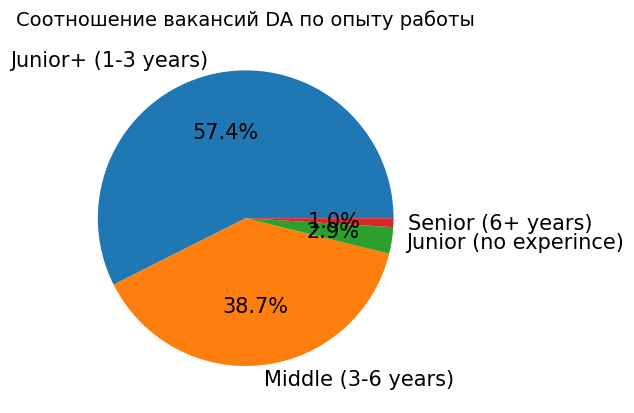

In [836]:
sizes = da_experience['proc']

fig, ax = plt.subplots()
ax.pie(sizes, labels=da_experience['experience'], autopct='%1.1f%%',
       textprops={'fontsize': 15})
ax.set_title('Соотношение вакансий DA по опыту работы', fontsize=14)
ax.tick_params(labelsize=10)
plt.show()

In [837]:
ds_experience = ds.groupby('experience').count()
ds_experience = ds_experience['name'].sort_values(ascending=False)
ds_experience

experience
Middle (3-6 years)       324
Junior+ (1-3 years)      289
Junior (no experince)     26
Senior (6+ years)         23
Name: name, dtype: int64

In [838]:
fig = px.bar(ds_experience.sort_values(ascending=True),
             title='Количество вакансий DS по опыту работы', x='name',
             labels={'name':'Количество вакансий', 'experience':'Опыт работы'}, height=300, width=700)
fig.show()

In [839]:
#определим долю каждого грейда
ds_experience = ds.groupby('experience').count()
ds_experience = ds_experience['employer'].sort_values(ascending=False).reset_index()
ds_experience['proc'] = (ds_experience['employer'] / ds_experience['employer'].sum()) * 100
ds_experience

,experience,employer,proc
0,Middle (3-6 years),324,48.94
1,Junior+ (1-3 years),289,43.66
2,Junior (no experince),26,3.93
3,Senior (6+ years),23,3.47


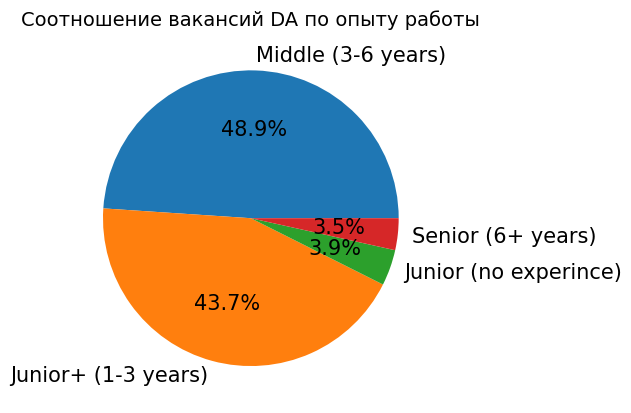

In [840]:
sizes = ds_experience['proc']

fig, ax = plt.subplots()
ax.pie(sizes, labels=ds_experience['experience'], autopct='%1.1f%%',
       textprops={'fontsize': 15})
ax.set_title('Соотношение вакансий DA по опыту работы', fontsize=14)
ax.tick_params(labelsize=10)
plt.show()

При наборе специалистов DA чаще всего ищут специалистов Junior+ (1-3 years), в то время как на вакансии DS чаще требуются Middle (3-6 years). Реже всего в обеих профессиях ведется поиск специалистов без опыта или высокоуровневых Senior (6+ years). Про последних можно сказать, что эта особенность обусловлена малым числом вакансий на высокие должности.

### Шаг 4.5 Вакансии по типу занятости

In [841]:
da_schedule = da.groupby('schedule').count()
da_schedule = da_schedule['name'].sort_values(ascending=False)
da_schedule

schedule
Полный день         236
Удаленная работа     63
Гибкий график         7
Сменный график        4
Name: name, dtype: int64

In [842]:
fig = px.bar(da_schedule.sort_values(ascending=True),
             title='Количество вакансий DA по типу занятости', x='name',
             labels={'name':'Количество вакансий', 'experience':'Тип занятости'}, height=300, width=700)
fig.show()

In [843]:
ds_schedule = ds.groupby('schedule').count()
ds_schedule = ds_schedule['name'].sort_values(ascending=False)
ds_schedule

schedule
Полный день         508
Удаленная работа    119
Гибкий график        32
Сменный график        3
Name: name, dtype: int64

In [863]:
fig = px.bar(ds_schedule.sort_values(ascending=True),
             title='Количество вакансий DS по типу занятости', x='name',
             labels={'name':'Количество вакансий', 'schedule':'Тип занятости'}, height=300, width=700)
fig.show()

По типу занятости вакансии DA и DS выглядят одинаково. Большинство сотрудников нанимают на полный рабочий день, реже встречаются вакансии с удаленным графиком, и крайне редко с гибким графиком работы.

### Шаг 4.6 Вакансии по графику работы

In [845]:
da_employment = da.groupby('employment').count()
da_employment = da_employment['name'].sort_values(ascending=False)
da_employment

employment
Полная занятость       308
Частичная занятость      2
Name: name, dtype: int64

In [846]:
fig = px.bar(da_employment.sort_values(ascending=True),
             title='Количество вакансий DS по графику работы', x='name',
             labels={'name':'Количество вакансий', 'employment':'График работы'}, height=300, width=700)
fig.show()

In [847]:
ds_employment = ds.groupby('employment').count()
ds_employment = ds_employment['name'].sort_values(ascending=False)
ds_employment

employment
Полная занятость       646
Стажировка              12
Проектная работа         2
Частичная занятость      2
Name: name, dtype: int64

In [848]:
fig = px.bar(ds_employment.sort_values(ascending=True),
             title='Количество вакансий DS по графику работы', x='name',
             labels={'name':'Количество вакансий', 'employment':'График работы'}, height=300, width=700)
fig.show()

Как видим, большинство специалистов в обеих областях нанимают на полный рабочий день. Среди специалистов DS встречаются вакансии стажеров, остальные графики работы представлены в данной выборке в единичных количествах.

### Шаг 4.7 Вакансии по заработной плате

In [849]:
da_salary_new = da.groupby('salary_new').count()
da_salary_new = da_salary_new['name'].sort_values(ascending=False)
da_salary_new

salary_new
ЗП не указана                285
От 200 тысяч до 300 тысяч     11
Больше 300 тысяч               7
От 100 тысяч до 200 тысяч      6
Меньше 100 тысяч               1
Name: name, dtype: int64

In [850]:
ds_salary_new = ds.groupby('salary_new').count()
ds_salary_new = ds_salary_new['name'].sort_values(ascending=False)
ds_salary_new

salary_new
ЗП не указана                606
Больше 300 тысяч              29
От 200 тысяч до 300 тысяч     14
От 100 тысяч до 200 тысяч      8
Меньше 100 тысяч               5
Name: name, dtype: int64

В колонках с заработной платой присуствует подавляющее количество - это незаполненные значения. Сдедовательно, заработная плата обычно работодателями не указывается, как для вакансий DS, так и DA.

### Подытог:

Распределение вакансий DA и DS по неделям имеет схожую динамику с пиком на предпоследней неделе апреля и спадом в начале марта, что отражает производственный календарь и праздничные дни. Работодатели для этих профессий публикую разное количество ваканcий, за исключением компании СБЕР, которая лидирует по найму специалистов в обеих областях. Это указывает на то, что даже компании с аналогичными внутренними процессами ищут специалистов в разных сферах. Например, OZON предпочитает DS, а WB — и DS, и DA. Банки, кроме Промсвязьбанка, также предпочитают DS, а мобильные операторы — DS для Ростелекома, Билайна и Мегафона и DA для МТС.

Разделение по грейдам показывает, что СБЕР предлагает вакансии для сотрудников с любым опытом, в то время как другие компании предпочитают Junior+ (1–3 года) и Middle (3–6 лет).

Лидеры по количеству открытых вакансий — Санкт-Петербург и Москва для DA и DS из-за их административного статуса. По другим городам сложно сделать выводы из-за малого количества данных.

Разделение по грейдам показывает, что с разным опытом работы больше требуется DS в некоторых городах, в то время как для DA-специалиста с любым опытом можно найти вакансии в основном только в Москве. При наборе специалистов DA чаще всего ищут Junior+ (1–3 года), а для DS чаще требуются Middle (3–6 лет). Реже всего в обеих профессиях ведётся поиск специалистов без опыта или высокоуровневых Senior (6+). Эта особенность связана с малым количеством вакансий на высокие должности.

Тип занятости для обеих профессий одинаковый — большинство сотрудников нанимаются на полный рабочий день, реже встречаются вакансии с удалённым графиком и крайне редко — с гибким графиком работы. Заработная плата обычно не указывается работодателями для вакансий DS и DA, что указывает на отсутствие определённой тенденции в оплате труда.

# Общий вывод

Оба датафрейма имеют одинаковое количество столбцов и разные наборы строк. В обоих датафреймах присутствуют пропуски в столбцах «Департамент», «ЗП ОТ» и «ЗП ДО», а также в описаниях навыков.

Для столбца «Департамент» пропуски заполним значениями «no_name». Пропуски в столбцах «ЗП ОТ» и «ЗП ДО» оставим как есть, так как найти эти данные невозможно, а заполнение пропусков изменит формат столбцов.

С колонками, в которых указаны навыки, будем работать отдельно. Необходимо разделить вакансии по грейдам, так как наименования вакансий требуют категоризации из-за большого разброса вариантов написания.

Вакансии DA представлены за период с 6 марта по 30 апреля 2024 года, а вакансии DS — с 29 февраля по 30 апреля того же года. Таким образом, данные в выгрузке относятся к двум месяцам — марту и апрелю.

Столбец с URL-адресами анализировать не будем, так как не планируем использовать его в анализе. Визуально столбцы «Департамент», «Локация» и «Опыт» выглядят нормально. Также можно сказать, что наименования вакансий можно не разделять по грейдам, так как требования уже указаны в столбце «Опыт».

Создадим дополнительный столбец для сведений о заработной плате, куда включим значения всех трёх столбцов с диапазонами ЗП, указанных работодателями.

ключевые навыки, заявленные работодателями, включают Python, Pandas и SQL для DS и DA. Разница заключается в том, что для DS чаще требуется Python, а для DA — SQL. Навыки анализа данных и машинного обучения определяют различия между вакансиями. Библиотека Pandas, Confluence и юнит-экономика являются обязательными для обеих вакансий. Набор софт-навыков одинаков для DS и DA, но для DS важно креативное мышление, а для DA — умение вести переговоры и решать проблемы.

Из-за малого объема данных мы не стали проводить анализ ключевых навыков в вакансия стажеров и сеньоров. Распределение навыков среди вакансий DS и DA грейда мидл и джун повторяют основную закономерность общего анализа набора ключевых навыков без разбивки по грейдам. Поэтому можно отметить, что в нашем наборе данных грейд практически не влияет на распределение навыков в вакансиях.

Распределение вакансий DA и DS по неделям имеет схожую динамику с пиком на предпоследней неделе апреля и спадом в начале марта, что отражает производственный календарь и праздничные дни. Работодатели для этих профессий публикую разное количество ваканчий, за исключением компании СБЕР, которая лидирует по найму специалистов в обеих областях. Это указывает на то, что даже компании с аналогичными внутренними процессами ищут специалистов в разных сферах. Например, OZON предпочитает DS, а WB — и DS, и DA. Банки, кроме Промсвязьбанка, также предпочитают DS, а мобильные операторы — DS для Ростелекома, Билайна и Мегафона и DA для МТС.

Разделение по грейдам показывает, что СБЕР предлагает вакансии для сотрудников с любым опытом, в то время как другие компании предпочитают Junior+ (1–3 года) и Middle (3–6 лет).

Лидеры по количеству открытых вакансий — Санкт-Петербург и Москва для DA и DS из-за их административного статуса. По другим городам сложно сделать выводы из-за малого количества данных.

Разделение по грейдам показывает, что с разным опытом работы больше требуется DS в некоторых городах, в то время как для DA-специалиста с любым опытом можно найти вакансии в основном только в Москве. При наборе специалистов DA чаще всего ищут Junior+ (1–3 года), а для DS чаще требуются Middle (3–6 лет). Реже всего в обеих профессиях ведётся поиск специалистов без опыта или высокоуровневых Senior (6+). Эта особенность связана с малым количеством вакансий на высокие должности.

Тип занятости для обеих профессий одинаковый — большинство сотрудников нанимаются на полный рабочий день, реже встречаются вакансии с удалённым графиком и крайне редко — с гибким графиком работы. Заработная плата обычно не указывается работодателями для вакансий DS и DA, что указывает на отсутствие определённой тенденции в оплате труда.